In [1]:
#Does education have an influence on earning capacity?
#Is there any relationship between the hours worked and the earnings?

In [41]:
import pandas as pd
file_name = 'adult.data'
data = pd.read_csv(file_name,delimiter=',',header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [42]:
# summarize dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       32561 non-null  int64 
 1   1       32561 non-null  object
 2   2       32561 non-null  int64 
 3   3       32561 non-null  object
 4   4       32561 non-null  int64 
 5   5       32561 non-null  object
 6   6       32561 non-null  object
 7   7       32561 non-null  object
 8   8       32561 non-null  object
 9   9       32561 non-null  object
 10  10      32561 non-null  int64 
 11  11      32561 non-null  int64 
 12  12      32561 non-null  int64 
 13  13      32561 non-null  object
 14  14      32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [43]:
#eliminate some of the continuous data that has no relevance to our analysis
data = data.drop([2,4,8,9],axis=1)

In [44]:
# add headers to the data
# print head()
data.columns = ['age','workclass',\
               'education','marital-status',\
               'occupation','relationship',\
               'capital-gain','capital-loss',\
               'hours-per-week','native-country','earning']
data.head()

,age,workclass,education,marital-status,occupation,relationship,capital-gain,capital-loss,hours-per-week,native-country,earning
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,0,0,40,Cuba,<=50K


In [45]:
#Aggregate the records based on education and then find the total count of people under each education group
Q1_1 = data.groupby(['education'])['earning'].agg('count')
Q1_1

education
 10th              933
 11th             1175
 12th              433
 1st-4th           168
 5th-6th           333
 7th-8th           646
 9th               514
 Assoc-acdm       1067
 Assoc-voc        1382
 Bachelors        5355
 Doctorate         413
 HS-grad         10501
 Masters          1723
 Preschool          51
 Prof-school       576
 Some-college     7291
Name: earning, dtype: int64

In [46]:
#filter the records based on people who are earning more than $50,000,
#aggregate this data based on education, and find the count under each category

Q1_2 = data[data['earning'] == ' >50K'].groupby\
                                        (['education'])\
                                        ['earning'].agg('count')
Q1_2

education
 10th              62
 11th              60
 12th              33
 1st-4th            6
 5th-6th           16
 7th-8th           40
 9th               27
 Assoc-acdm       265
 Assoc-voc        361
 Bachelors       2221
 Doctorate        306
 HS-grad         1675
 Masters          959
 Prof-school      423
 Some-college    1387
Name: earning, dtype: int64

In [47]:
#create a new DataFrame by dividing the second DataFrame by the first one and
#multiplying it by 100, to get the proportion:

Q1_3 = pd.DataFrame((Q1_2 / Q1_1) * 100)
Q1_3.head()

,earning
education,
10th,6.645230
11th,5.106383
12th,7.621247
1st-4th,3.571429
5th-6th,4.804805


In [48]:
# rename the earning column to Proportion 
Q1_3.columns = ['Proportion']
Q1_3.head()

,Proportion
education,
10th,6.645230
11th,5.106383
12th,7.621247
1st-4th,3.571429
5th-6th,4.804805


In [49]:
# Round off  decimals in  Proportion column to two decimal places using   .round()
Q1_3 = Q1_3.round({'Proportion': 2})
Q1_3.head()

,Proportion
education,
10th,6.65
11th,5.11
12th,7.62
1st-4th,3.57
5th-6th,4.80


<AxesSubplot:title={'center':'Earning proportion with Education'}, xlabel='education'>

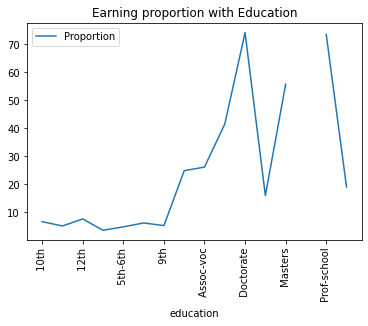

In [50]:
Q1_3.plot.line(y='Proportion',rot=90,title='Earning proportion with Education')

In [54]:
Q1_3 = Q1_3.reindex(index = [' 1st-4th',' 5th-6th',' 7th-8th',' 9th',' 10th', ' 11th', ' 12th',' HS-grad',' Some-college',' Assoc-acdm',' Assoc-voc',' Bachelors',' Masters',' Prof-school',' Doctorate'])
                             
Q1_3.head()

,Proportion
education,
1st-4th,NaN
5th-6th,NaN
7th-8th,NaN
9th,NaN
10th,NaN


Text(0, 0.5, 'Proportion')

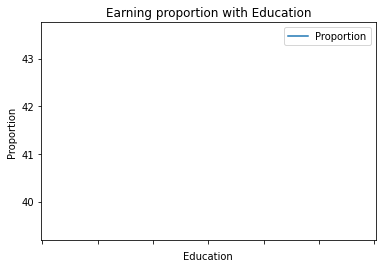

In [55]:
propPlot = Q1_3.plot.line(y='Proportion',rot=90,title ='Earning proportion with Education')
propPlot.set_xlabel("Education")
propPlot.set_ylabel("Proportion")